## This is a level 2 heading
#### this is another line

In [118]:
%matplotlib inline
import pandas
import numpy
import scipy
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [119]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=['code', 'cl_thick', 'c_size', 'c_shape', 'marg_adh', 's_ep_c_size', 
       'b_nuclei', 'b_chromatin', 'n_nucleoli', 'mitoses', 'diag'] 
data = pandas.read_csv(url, names=names)
array = data.values

In [120]:
data.drop('code', axis=1, inplace=True)
data.head()

,cl_thick,c_size,c_shape,marg_adh,s_ep_c_size,b_nuclei,b_chromatin,n_nucleoli,mitoses,diag
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [121]:
data.shape

(699, 10)

In [100]:
data.dtypes
pandas.unique(data.b_nuclei.ravel())
#data.b_nuclei.unique

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'], dtype=object)

In [107]:
data1 = data[data.b_nuclei != '?']
data1.b_nuclei = data1.b_nuclei.astype('int')
pandas.unique(data1.b_nuclei.ravel())

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6])

In [122]:
data1.shape

(683, 10)

In [111]:
data2 = data[data.b_nuclei == '?']
data2.b_nuclei = int(round(data1.b_nuclei.mean()))
pandas.unique(data2.b_nuclei.ravel())

array([4])

In [123]:
data2.shape

(16, 10)

In [124]:
result = pandas.concat([data1, data2])
pandas.unique(result.b_nuclei.ravel())

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6])

In [125]:
result.shape

(699, 10)

In [94]:
#take all the values that are not -1 and calculate the mean; set the ? to the mean
data.b_nuclei.replace(['?'],[pandas.np.nan],inplace=True)
#pandas.unique(hh.b_nuclei.ravel())
#print(hh)
pandas.unique(data.b_nuclei.ravel())

array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'], dtype=object)

In [92]:
data['b_nuclei'].astype('int')

ValueError: cannot convert float NaN to integer

In [73]:
data.dtypes
pandas.unique(data.b_nuclei.ravel())

array(['1', '10', '2', '4', '3', '9', '7', -1, '5', '8', '6'], dtype=object)

In [69]:
d1 = data[data.b_nuclei.isin(['?'])]
#d1.b_nuclei = '-1'
d1

,cl_thick,c_size,c_shape,marg_adh,s_ep_c_size,b_nuclei,b_chromatin,n_nucleoli,mitoses,diag
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [74]:
d2 = data[~data.b_nuclei.isin(['?'])]

,cl_thick,c_size,c_shape,marg_adh,s_ep_c_size,b_nuclei,b_chromatin,n_nucleoli,mitoses,diag
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [38]:
pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)
description = data.describe()
print(description)

       cl_thick   c_size  c_shape  marg_adh  s_ep_c_size  b_chromatin  n_nucleoli  mitoses  \
count   699.000  699.000  699.000   699.000      699.000      699.000     699.000  699.000   
mean      4.418    3.134    3.207     2.807        3.216        3.438       2.867    1.589   
std       2.816    3.051    2.972     2.855        2.214        2.438       3.054    1.715   
min       1.000    1.000    1.000     1.000        1.000        1.000       1.000    1.000   
25%       2.000    1.000    1.000     1.000        2.000        2.000       1.000    1.000   
50%       4.000    1.000    1.000     1.000        2.000        3.000       1.000    1.000   
75%       6.000    5.000    5.000     4.000        4.000        5.000       4.000    1.000   
max      10.000   10.000   10.000    10.000       10.000       10.000      10.000   10.000   

          diag  
count  699.000  
mean     2.690  
std      0.951  
min      2.000  
25%      2.000  
50%      2.000  
75%      4.000  
max      4.000  


In [39]:
[data[data.diag == 2].shape[0],data[data.diag != 2].shape[0]]

[458, 241]

In [40]:
correlations = data.corr(method='pearson')
print(correlations)

             cl_thick  c_size  c_shape  marg_adh  s_ep_c_size  b_chromatin  n_nucleoli  mitoses  \
cl_thick        1.000   0.645    0.655     0.486        0.522        0.558       0.536    0.350   
c_size          0.645   1.000    0.907     0.706        0.752        0.756       0.723    0.459   
c_shape         0.655   0.907    1.000     0.683        0.720        0.736       0.719    0.439   
marg_adh        0.486   0.706    0.683     1.000        0.600        0.667       0.603    0.418   
s_ep_c_size     0.522   0.752    0.720     0.600        1.000        0.616       0.629    0.479   
b_chromatin     0.558   0.756    0.736     0.667        0.616        1.000       0.666    0.344   
n_nucleoli      0.536   0.723    0.719     0.603        0.629        0.666       1.000    0.428   
mitoses         0.350   0.459    0.439     0.418        0.479        0.344       0.428    1.000   
diag            0.716   0.818    0.819     0.697        0.683        0.757       0.712    0.423   

         

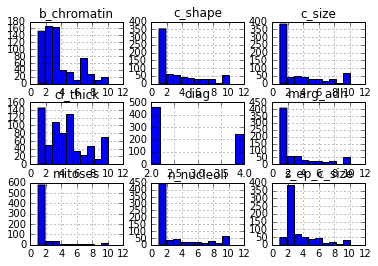

In [41]:
data.hist()
plt.show()

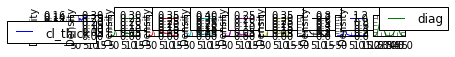

In [126]:
data.plot(kind= 'density' , subplots=True, layout=(9,9), sharex=False)
plt.show()

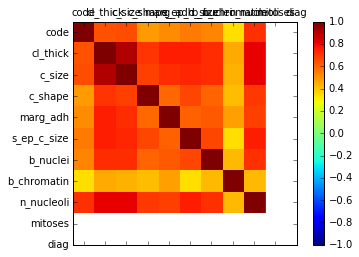

In [43]:
#figure out how to display this correctly
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

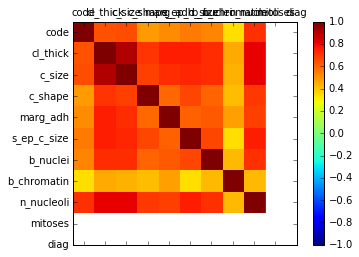

In [147]:
#figure out how to display this correctly
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [44]:
# calculate the correlations
coefficients = ['pearson', 'kendall', 'spearman']

csv_corr = {}

for coefficient in coefficients:
    csv_corr[coefficient] = data \
        .corr(method=coefficient) \
        .transpose()
        
print(csv_corr)

{'kendall':              cl_thick  c_size  c_shape  marg_adh  s_ep_c_size  b_chromatin  n_nucleoli  mitoses  \
cl_thick        1.000   0.537    0.534     0.433        0.470        0.418       0.462    0.353   
c_size          0.537   1.000    0.815     0.640        0.682        0.599       0.663    0.455   
c_shape         0.534   0.815    1.000     0.605        0.650        0.572       0.628    0.419   
marg_adh        0.433   0.640    0.605     1.000        0.571        0.511       0.547    0.400   
s_ep_c_size     0.470   0.682    0.650     0.571        1.000        0.522       0.609    0.431   
b_chromatin     0.418   0.599    0.572     0.511        0.522        1.000       0.561    0.333   
n_nucleoli      0.462   0.663    0.628     0.547        0.609        0.561       1.000    0.454   
mitoses         0.353   0.455    0.419     0.400        0.431        0.333       0.454    1.000   
diag            0.593   0.778    0.754     0.667        0.695        0.654       0.688    0.509  

In [52]:
array = data.values
X = array[:,0:8]
Y = array[:,8]
X[1]
# # feature extraction
# test = SelectKBest(score_func=chi2, k=4)
# fit = test.fit(X, Y)
# # summarize scores
# numpy.set_printoptions(precision=3)
# print(fit.scores_)
# features = fit.transform(X)
# # summarize selected features
# #print(features[0:5,:])

array([5, 4, 4, 5, 7, '10', 3, 2], dtype=object)